<a href="https://colab.research.google.com/github/Vlxn761/redshift-fotometrico/blob/main/Red%20neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import time
from sklearn.model_selection import train_test_split

# Understanding how Neuronal Networks work

We can simplify the understanding of NN to a sequence of linear operations.


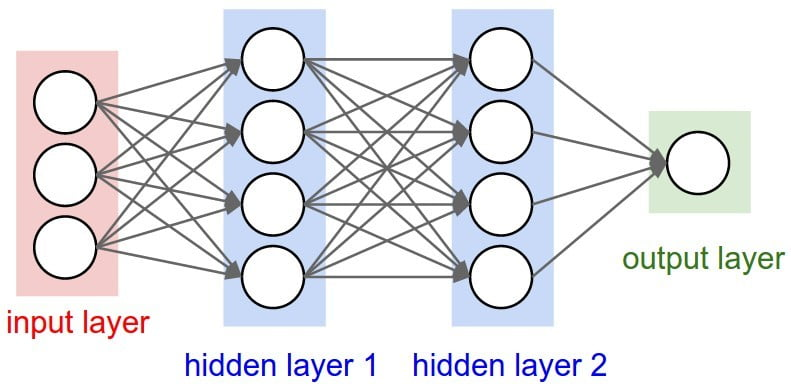

Every connection between neurons means:

$$y = a_0\cdot x + a_1$$

where $x$ is the input value, $y$ is the output value, and $a_0$ and $a_1$ are trainable parameters.

## Example problem: Transform celcius to Fahrenheit

We know the equation that describes this conversion writes:
$$
\text{F} = (\text{C} \cdot a) + b
$$

with $a=9/5=1.8$ and $b=32$, however, let's see if the model is able to predict these very same numbers.


### create dummy data-set

Note that we could add some errors to make this more realistic, but for this example it's unnecessary.

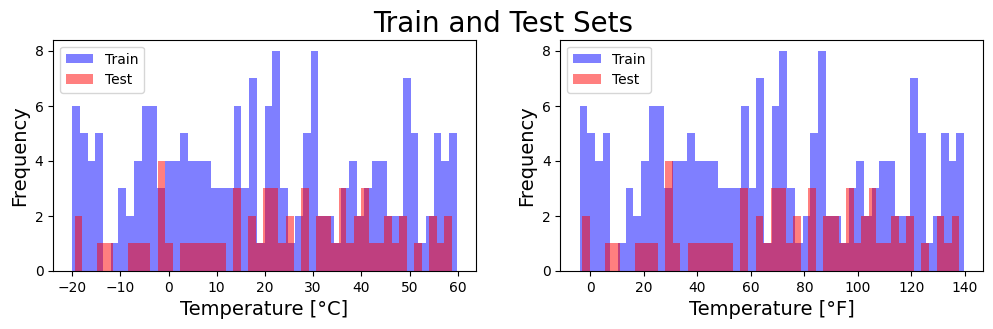

In [ ]:
def cel2far(celcius):
    return (celcius * 9/5) + 32

# Number of data points to use
n_data = 250

np.random.seed(8)
celcius_values = np.random.uniform(-20, 60, n_data)
farenheit_values = cel2far(celcius_values)

x_train, x_test, y_train, y_test = train_test_split(celcius_values, farenheit_values, test_size=.25)

# Visualize the sets
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 3))
plt.suptitle('Train and Test Sets', fontsize=20)

axs[0].hist(x_train, bins=50, alpha=0.5, label='Train', color='blue')
axs[0].hist(x_test, bins=50, alpha=0.5, label='Test', color='red')
axs[0].set_xlabel('Temperature [°C]', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].legend()

axs[1].hist(y_train, bins=50, alpha=0.5, label='Train', color='blue')
axs[1].hist(y_test, bins=50, alpha=0.5, label='Test', color='red')
axs[1].set_xlabel('Temperature [°F]', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].legend()

plt.show()

### Model 1

Let's create a simple model with only 1 neuron, ie, two trainable parameters

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)), # What shape will have the data that the model receives
    tf.keras.layers.Dense(units=1), # What shape should have the output
], name='model1' # And we can allways give our model a name
)

# we can always visualize the model's arquitecture like this
model1.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

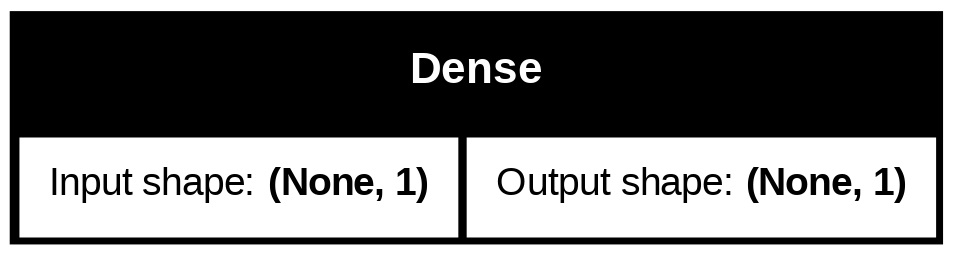

In [ ]:
# Or by using the plot_model function, tho here's its quite lame
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True)

Once the model has been created, the first step in training it is to compile it. It tells the model crucial information such as *what **optimizer** should it use?* (this tells the model how it should be trained internally), *what **loss fucntion** should it use?* (used to tell how good the model is doing during training - the model will try to minimise it), and *what king of **metrics** do we care about?* (quantities that we can know for us to see how good the model is doing, usually accuracy, presicion etc for classification problems).

In [ ]:
# The model is compiled with optimizer 'adam' and loss 'mean_squared_error'
# which is the most general for regression problems.
model1.compile(optimizer='adam', loss='mean_squared_error')

Now we can train it. During the training process there are a few variables that we need to keep in mind (besides the training data):

- **epochs** [int] : An epoch can be understood as a complete view of the training data. After an epoch, the model will train itself, changing the values of it's parameters, trying to minimise the loss function. The number of epochs is the number of times the training process will repeat this process.

- batch_size** [int] : A batch is a subgroup of the data set, then batch_size is the size of these groups, for example a data set of 100 elements with batch_size of 10 makes 10 batches. During an epoch the model will see all the batches, but the idea is that the model trains one batch at a time, and when it has seen a whole batch it adjusts its parameters. This can be thought of as a mini epoch within each epoch.

- verbose** [int: 0, 1, 2]: This value tells the model how much information to display during training. If you are only interested in the result, choose **0**. If you want to see information during the training, choose a value greater than 0. The higher the verbose, the more information (details of the training) will be displayed.

- Validation or validation_split** [data or float]: This is where you tell the model that there's going to be additional data during training that the model will never "see" for training, just to measure itself to see if improvements in predicting values in the training show improvements in the validation set as well. You can pass this data to *validation_data =(X_val, y_val)* or use *validation_split=fraction*. Note that if you choose the latter, a *fraction* of the training data will be used to create this validation data.

- **Callbacks** [List of objects]: The callbacks are special objects that allow to interact with the model during the training process and can make "decisions" after some outputs. The capabilities vary from callback to callback, but in general you can do things like *stop training*, *save the best model*, *save any model during training*, *pause training*, *share your training with others* and others. We will discuss some of these in more detail later.


There're some others parameters that may be useful depending of the situation, to check this in more detail go to the [documentation](https://www.tensorflow.org). We finally train the models with `model.fit(X_data, y_data, **parameters)`



In [ ]:
# This is to keep the seed constant for reproducibility
tf.random.set_seed(8)

t0 = time.time()
# Here we train the model.
hist1 = model1.fit(x_train, y_train, epochs=250, batch_size=32, verbose=2, validation_split=0.25)
trainning_time_model1 = time.time() - t0

Epoch 1/250
5/5 - 1s - 299ms/step - loss: 13380.6758 - val_loss: 11928.1914
Epoch 2/250
5/5 - 1s - 142ms/step - loss: 13345.7539 - val_loss: 11897.1328
Epoch 3/250
5/5 - 0s - 31ms/step - loss: 13310.8799 - val_loss: 11866.1113
Epoch 4/250
5/5 - 0s - 26ms/step - loss: 13276.0469 - val_loss: 11835.1357
Epoch 5/250
5/5 - 0s - 24ms/step - loss: 13241.2666 - val_loss: 11804.2031
Epoch 6/250
5/5 - 0s - 28ms/step - loss: 13206.5381 - val_loss: 11773.3223
Epoch 7/250
5/5 - 0s - 31ms/step - loss: 13171.8643 - val_loss: 11742.4902
Epoch 8/250
5/5 - 0s - 27ms/step - loss: 13137.2500 - val_loss: 11711.7158
Epoch 9/250
5/5 - 0s - 24ms/step - loss: 13102.6963 - val_loss: 11680.9951
Epoch 10/250
5/5 - 0s - 17ms/step - loss: 13068.2070 - val_loss: 11650.3320
Epoch 11/250
5/5 - 0s - 14ms/step - loss: 13033.7822 - val_loss: 11619.7256
Epoch 12/250
5/5 - 0s - 31ms/step - loss: 12999.4219 - val_loss: 11589.1797
Epoch 13/250
5/5 - 0s - 20ms/step - loss: 12965.1260 - val_loss: 11558.6924
Epoch 14/250
5/5 - 

### Model 2

Now we create a model with 3 dense layers of 10 neurons each. Note that except for the architecture, the rest is analogue to model1.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)), #Input shape
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1) # Output shape
], name='model2')

model2.summary()

Model: "model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error')

tf.random.set_seed(8)
t0 = time.time()
hist2 = model2.fit(x_train, y_train, epochs=250, batch_size=32, verbose=2, validation_split=0.25)
trainning_time_model2 = time.time() - t0

Epoch 1/250
5/5 - 1s - 297ms/step - loss: 7605.8623 - val_loss: 6417.1548
Epoch 2/250
5/5 - 0s - 11ms/step - loss: 6945.7524 - val_loss: 5857.3438
Epoch 3/250
5/5 - 0s - 11ms/step - loss: 6327.6494 - val_loss: 5332.7974
Epoch 4/250
5/5 - 0s - 11ms/step - loss: 5747.2363 - val_loss: 4838.6987
Epoch 5/250
5/5 - 0s - 10ms/step - loss: 5199.0449 - val_loss: 4370.5723
Epoch 6/250
5/5 - 0s - 11ms/step - loss: 4678.3613 - val_loss: 3924.7295
Epoch 7/250
5/5 - 0s - 11ms/step - loss: 4181.2119 - val_loss: 3498.1311
Epoch 8/250
5/5 - 0s - 11ms/step - loss: 3704.5767 - val_loss: 3089.1362
Epoch 9/250
5/5 - 0s - 11ms/step - loss: 3247.2881 - val_loss: 2698.1921
Epoch 10/250
5/5 - 0s - 14ms/step - loss: 2810.6208 - val_loss: 2327.9492
Epoch 11/250
5/5 - 0s - 24ms/step - loss: 2398.2231 - val_loss: 1982.8657
Epoch 12/250
5/5 - 0s - 12ms/step - loss: 2015.5690 - val_loss: 1668.5525
Epoch 13/250
5/5 - 0s - 12ms/step - loss: 1669.1710 - val_loss: 1390.9637
Epoch 14/250
5/5 - 0s - 11ms/step - loss: 1365

### Compare models

In [ ]:
# Some dummy function to make cleaner the visualization
def plot_history(hist, label='model', log=0, **kargs):
    plt.xlabel("# Época")
    plt.ylabel("Error")

    if log:
        plt.yscale('log')

    plt.plot(hist.history["val_loss"], label=label+' val', **kargs)
    plt.plot(hist.history["loss"], '--', label=label+' train', **kargs)
    plt.legend()


One method to compare models is using the `Model.evaluate()` function

In [ ]:
model1_loss = model1.evaluate(x_test, y_test, verbose=0)
model2_loss = model2.evaluate(x_test, y_test, verbose=0)

print(f"Model 1 loss: {model1_loss}")
print(f"Model 2 loss: {model2_loss}")

Model 1 loss: 7283.52197265625
Model 2 loss: 0.11049511283636093


However, its allways a good sanity check to look at the trainning history

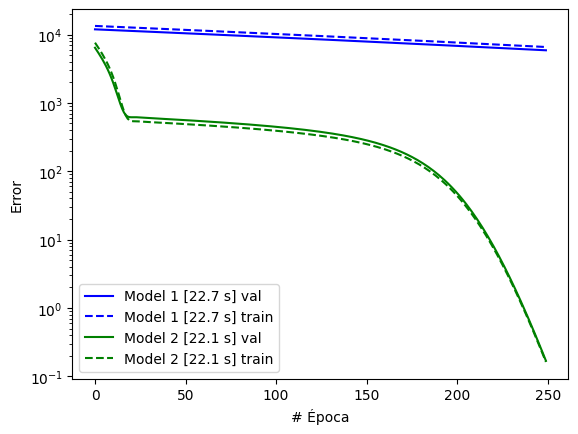

In [ ]:
plot_history(hist1, log=1, label=f'Model 1 [{trainning_time_model1:.1f} s]', color='blue')
plot_history(hist2, log=1, label=f'Model 2 [{trainning_time_model2:.1f} s]', color='green')

The result is clear, `model2` works orders of magnitude better than `model0`, but why is that? What makes `model1` evolve so badly? It's because the learning rate, a parameter that goes inside the `optimizer`, controlls how muchs the model parameters change with each iteration.

 If we modify this values we can see a notorius change on the history of the models

In [ ]:
# Create and train model 1 again but with a different optimizer
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1),
], name='model1')

# Now instead of using the string version, we call the object Adam
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

t0 = time.time()
hist1 = model1.fit(x_train, y_train, epochs=250, verbose=2, validation_split=0.25)
trainning_time_model1 = time.time() - t0

# Create and train model 2 again but with a different optimizer
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
], name='model2')

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

t0 = time.time()
hist2 = model2.fit(x_train, y_train, epochs=250, verbose=2, validation_split=0.25)
trainning_time_model2 = time.time() - t0

Epoch 1/250
5/5 - 1s - 131ms/step - loss: 3297.3882 - val_loss: 2136.7354
Epoch 2/250
5/5 - 0s - 37ms/step - loss: 1942.1866 - val_loss: 1243.4099
Epoch 3/250
5/5 - 0s - 12ms/step - loss: 1078.6683 - val_loss: 763.3475
Epoch 4/250
5/5 - 0s - 12ms/step - loss: 648.5204 - val_loss: 598.0553
Epoch 5/250
5/5 - 0s - 12ms/step - loss: 522.3095 - val_loss: 600.3062
Epoch 6/250
5/5 - 0s - 11ms/step - loss: 535.4569 - val_loss: 634.3652
Epoch 7/250
5/5 - 0s - 14ms/step - loss: 559.2080 - val_loss: 633.0532
Epoch 8/250
5/5 - 0s - 27ms/step - loss: 545.5135 - val_loss: 598.2710
Epoch 9/250
5/5 - 0s - 11ms/step - loss: 508.3470 - val_loss: 558.3635
Epoch 10/250
5/5 - 0s - 11ms/step - loss: 475.3801 - val_loss: 531.3527
Epoch 11/250
5/5 - 0s - 16ms/step - loss: 457.6819 - val_loss: 516.6765
Epoch 12/250
5/5 - 0s - 11ms/step - loss: 449.4230 - val_loss: 506.0338
Epoch 13/250
5/5 - 0s - 10ms/step - loss: 441.5623 - val_loss: 494.4352
Epoch 14/250
5/5 - 0s - 11ms/step - loss: 430.8698 - val_loss: 482.

In [ ]:
model1_loss = model1.evaluate(x_test, y_test, verbose=0)
model2_loss = model2.evaluate(x_test, y_test, verbose=0)

print(f"Model 1 loss: {model1_loss}")
print(f"Model 2 loss: {model2_loss}")

Model 1 loss: 8.960031118476763e-05
Model 2 loss: 0.0009442190057598054


Now both models are able to reach low values of *loss*

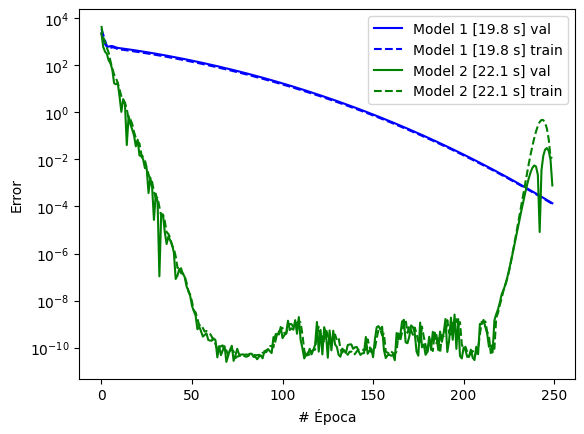

In [ ]:
plot_history(hist1, log=1, label=f'Model 1 [{trainning_time_model1:.1f} s]', color='blue')
plot_history(hist2, log=1, label=f'Model 2 [{trainning_time_model2:.1f} s]', color='green')

We see a variation in the learning curves of both models, but do you see anything strange about the learning curve of `model 2`? As well as working better, there are some periods where it does not seem to be training correctly. The bad thing is that if the model stops training in one of these periods, we may end up with a model that is not the best option based on what we have learned. Later we will solve this inconvenience to ensure that we always have the best model after training.

The *learning_rate* tells the model how much it can variate the model parameters values after each epoch.

There are many reasons why you would like to also change the value of the learning_rate after some epochs. To do so you are encouraged to check the [documentation link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule).

In [ ]:
# Comparison of model 1 and model 2 with a real temperature

cel_val = 100.0

print(f'For {cel_val}°C, model 1 predicts: {model1.predict(np.array([cel_val]), verbose=0)[0][0]}°F, \
error = {np.abs(model1.predict(np.array([cel_val]), verbose=0)[0][0] - cel2far(cel_val)):.6f}')
print(f'For {cel_val}°C, model 2 predicts: {model2.predict(np.array([cel_val]), verbose=0)[0][0]}°F, \
error = {np.abs(model2.predict(np.array([cel_val]), verbose=0)[0][0] - cel2far(cel_val)):.6f}')

For 100.0°C, model 1 predicts: 212.0169219970703°F, error = 0.016922
For 100.0°C, model 2 predicts: 212.09349060058594°F, error = 0.093491


Now let's check how the model did with the predictions of the values ($a=1.8$ | $b=32$)

In [ ]:
model1.layers[0].get_weights()


[array([[1.8003137]], dtype=float32), array([31.985554], dtype=float32)]

Model 1 was indeed able to get parameters close to the values of $a$ and $b$. This reinforces the idea that neural networks are, after all, just linear algebra.

Keep in mind that this is only for the sake of this example. Usually, check the values of the layers (when the model is denser) feels more like a black box...

In [ ]:
model2.layers[0].get_weights()

[array([[-0.11195425, -0.18950237, -0.6531526 , -0.02495981, -0.22313277,
         -0.07295653,  0.05508495,  0.00821185,  0.3511739 , -0.33084035]],
       dtype=float32),
 array([ 1.4331508 , -2.0021772 , -2.0984507 ,  2.0804274 , -1.1129446 ,
         0.43529645,  0.12903361, -1.963689  , -1.1039743 , -2.1559482 ],
       dtype=float32)]

There are other ways of comparing the models, with themselves and with the original data, to see how well they have performed (this is more intuitive to see than just looking at the loss function).

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


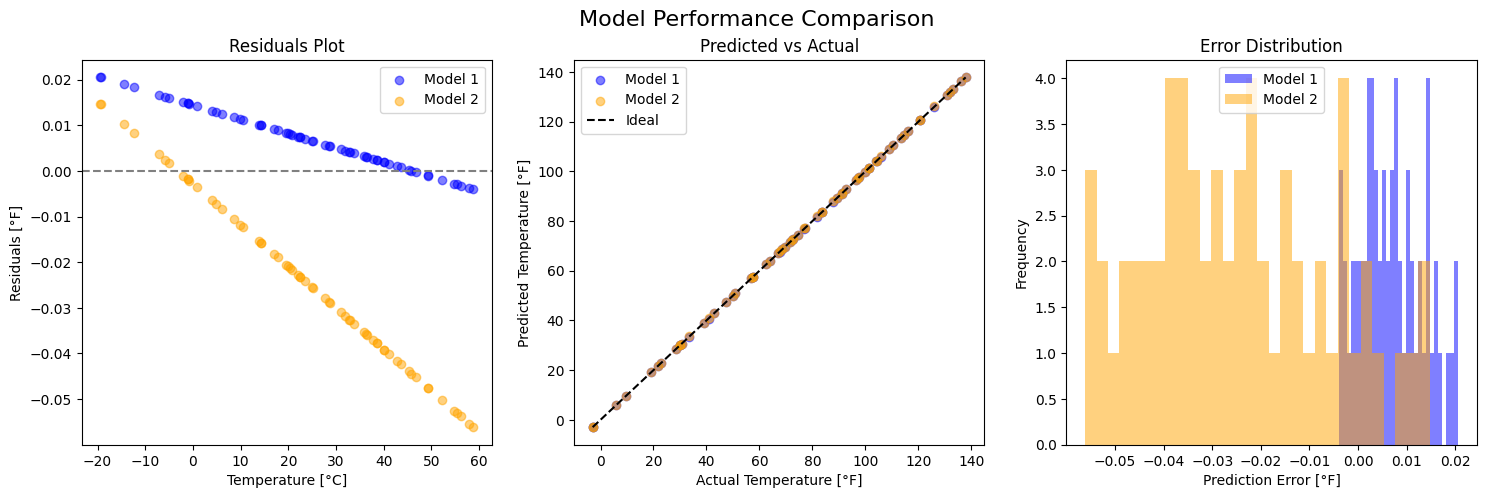

In [ ]:
# Generate predictions
y_pred_model1 = model1.predict(x_test)
y_pred_model2 = model2.predict(x_test)

# Calculate residuals
residuals_model1 = y_test - y_pred_model1.flatten()
residuals_model2 = y_test - y_pred_model2.flatten()

# Set up figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison', fontsize=16)

# 1. Residual Plot
axs[0].scatter(x_test, residuals_model1, alpha=0.5, color='blue', label='Model 1')
axs[0].scatter(x_test, residuals_model2, alpha=0.5, color='orange', label='Model 2')
axs[0].axhline(0, color='gray', linestyle='--')
axs[0].set_xlabel('Temperature [°C]')
axs[0].set_ylabel('Residuals [°F]')
axs[0].set_title('Residuals Plot')
axs[0].legend()

# 2. Predicted vs. Actual Plot
axs[1].scatter(y_test, y_pred_model1, alpha=0.5, color='blue', label='Model 1')
axs[1].scatter(y_test, y_pred_model2, alpha=0.5, color='orange', label='Model 2')
axs[1].plot(np.sort(y_test), np.sort(y_test), color='black', linestyle='--', label='Ideal')
axs[1].set_xlabel('Actual Temperature [°F]')
axs[1].set_ylabel('Predicted Temperature [°F]')
axs[1].set_title('Predicted vs Actual')
axs[1].legend()

# 3. Error Distribution Plot
axs[2].hist(residuals_model1, bins=30, alpha=0.5, color='blue', label='Model 1')
axs[2].hist(residuals_model2, bins=30, alpha=0.5, color='orange', label='Model 2')
axs[2].set_xlabel('Prediction Error [°F]')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Error Distribution')
axs[2].legend()

plt.show()

# Tracking models (Tensorboard and Callbacks)

Now that we know how to train a basic model, let's check how can we improve our experience working with NN using callbacks and Tensorboard

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs if there are any
!rm -rf ./logs/

In [ ]:
# Here I arbritrarily tell it that create a session in the folder "logs"
# But it can be whaterver really, the only thing that matters is that we
# have models there.
%tensorboard --logdir logs

## Train again models 1 and 2 but using callbacks

Here we use 3 callbacks:

- **TensorBoard**: Connects our model training process (the loss and metrics) to the TensorBoard session. It is important that we create the session in the same folder (or subfolder) as the model.

- **ModelCheckpoint**: This is where we save models during training. The parameters are self-explanatory, but note that we can save the models of all epochs (v1) of only the best mode (v2). For the latter it is recommended to use *val_loss* as `monitor`.

In [ ]:
# TensorBoard callback for model1
logdir_model1 = "logs/cel2far/model1"
tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir_model1)

# ModelCheckpoint callbacks for model1
# v1
checkpoint_path_all1 = "checkpoints/model1/cp-{epoch:04d}.weights.h5"
cp_callback_all1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_all1,
    save_weights_only=True,
    save_freq='epoch'
)

# v2
checkpoint_path_best1 = "checkpoints/model1/best.weights.h5"
cp_callback_best1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_best1,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)


# Define model1
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1),
], name='model1')

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

# Train model1
t0 = time.time()
hist1 = model1.fit(
    x_train, y_train,
    epochs=250,
    verbose=0,
    validation_split=0.25,
    callbacks=[tensorboard_callback1, cp_callback_all1, cp_callback_best1]
)
training_time_model1 = time.time() - t0

In [ ]:
# TensorBoard callback for model2
logdir_model2 = "logs/cel2far/model2"
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=logdir_model2)

# ModelCheckpoint callbacks for model2
# v1
checkpoint_path_all2 = "checkpoints/model2/cp-{epoch:04d}.weights.h5"
cp_callback_all2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_all2,
    save_weights_only=True,
    save_freq='epoch'
)

# v2
checkpoint_path_best2 = "checkpoints/model2/best.weights.h5"
cp_callback_best2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_best2,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)


# Define model2
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
], name='model2')

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

# Train model2
t0 = time.time()
hist2 = model2.fit(
    x_train, y_train,
    epochs=250,
    verbose=0,
    validation_split=0.25,
    callbacks=[tensorboard_callback2, cp_callback_all2, cp_callback_best2]
)
training_time_model2 = time.time() - t0


Now we can plot the model history again. Note that if you refresh the Tensorboard session you will see that there are now some options and graphs. This shows you a little bit of how the training has gone, how the models are developing and the difference in value from the training. If you were to add more metrics, you would see more graphs. To learn more about TensorBoard you can read the [Getting Started with TensorBoard] (https://www.tensorflow.org/tensorboard/get_started?hl=es-419).


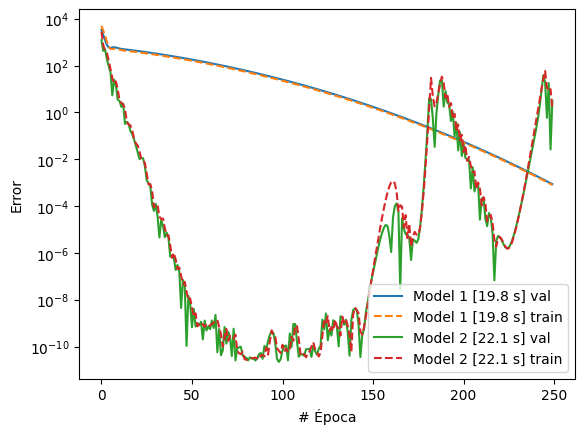

In [ ]:
plot_history(hist1, log=1, label=f'Model 1 [{trainning_time_model1:.1f} s]')
plot_history(hist2, log=1, label=f'Model 2 [{trainning_time_model2:.1f} s]')

## Loading a model epoch

Because of ModelCheckpoint v2, each model has the one epoch that gave it the best 'val_loss', but if you want to load that model, or any other epoch, you can do so:

In [ ]:
# We save weights, so we load weights. If we would have saved the model
# instead, we would have to load the model with Model.load_model()
model1.load_weights(checkpoint_path_best1)
model2.load_weights(checkpoint_path_best2)

In [ ]:
model1_loss = model1.evaluate(x_test, y_test, verbose=0)
model2_loss = model2.evaluate(x_test, y_test, verbose=0)

# The best version of each architecture
print(f"Model 1 loss: {model1_loss}")
print(f"Model 2 loss: {model2_loss}")

Model 1 loss: 0.0005694082356058061
Model 2 loss: 5.701755734222047e-11
